Dataset Shape: (45211, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Missing Values:
age          0
job          0
marit

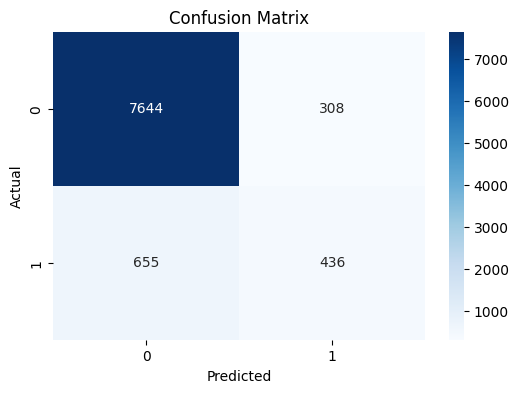

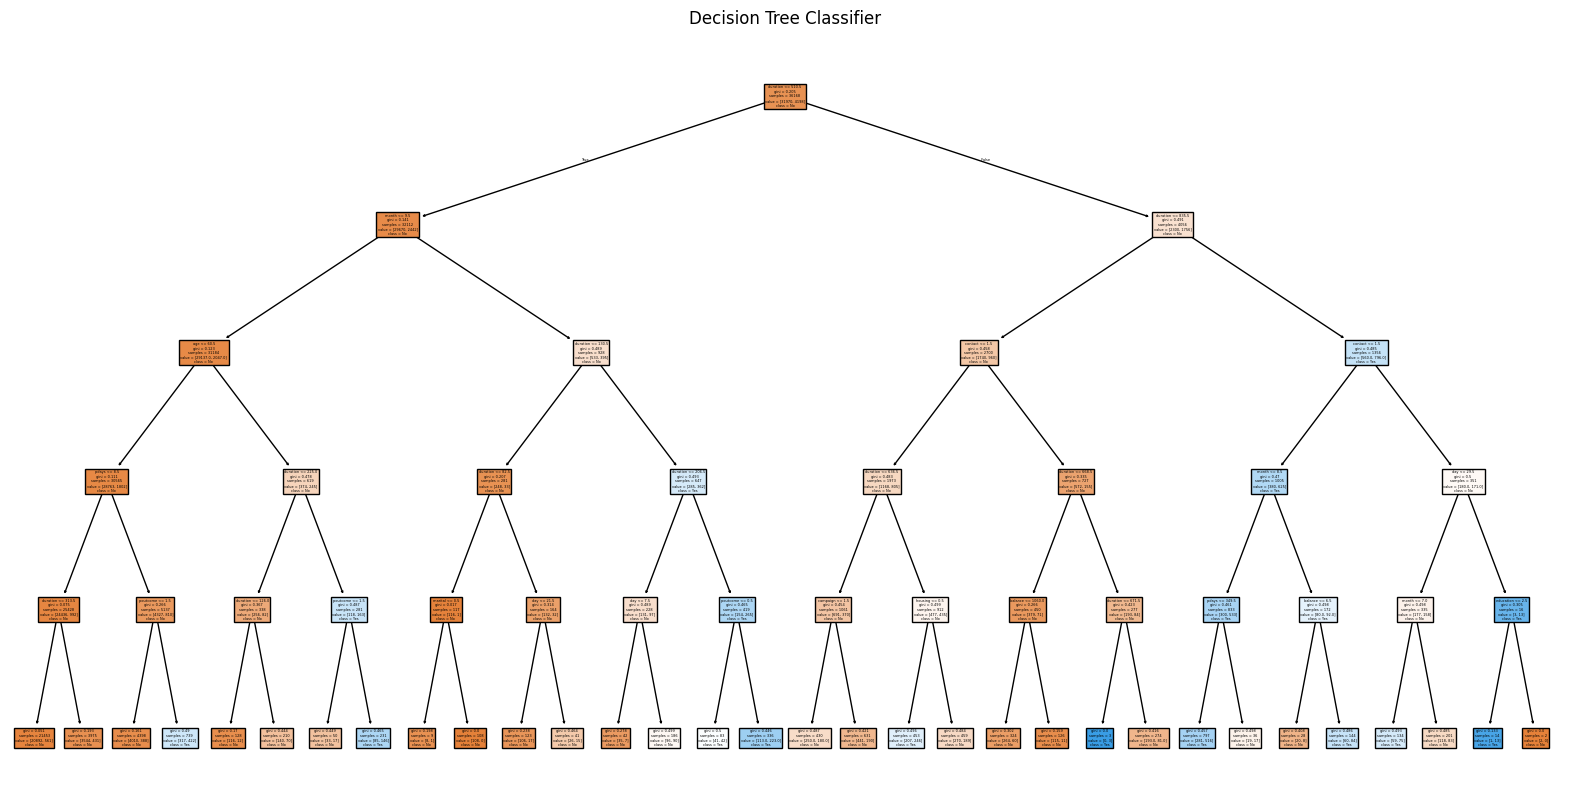


Task 03 Completed Successfully!


In [1]:
# ===============================
# Task 03 - Decision Tree Classifier
# Bank Marketing Dataset (UCI)
# ===============================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------
# Load Dataset
# -------------------------------
# Make sure bank-full.csv is in the same folder
df = pd.read_csv("/content/bank-full.csv", sep=";")

# -------------------------------
# Basic Exploration
# -------------------------------
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# -------------------------------
# Encode Categorical Variables
# -------------------------------
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

# -------------------------------
# Define Features & Target
# -------------------------------
X = df.drop("y", axis=1)   # Features
y = df["y"]                # Target

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Build Decision Tree Model
# -------------------------------
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

# -------------------------------
# Model Prediction
# -------------------------------
y_pred = model.predict(X_test)

# -------------------------------
# Model Evaluation
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# -------------------------------
# Confusion Matrix
# -------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# Decision Tree Visualization
# -------------------------------
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.title("Decision Tree Classifier")
plt.show()

print("\nTask 03 Completed Successfully!")
